___
## Drug reviews -  UCI dataset
___
This is a problem involving drug reviews done by patients and the main goal is to predict the drug name based on the patient's condition.
The original dataset is available on the following website: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

The raw data is processed by using the Python script called **preprocessing.py** available in the same directory where this notebook is located.

Data Set Information:

The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The intention was to study

(1) sentiment analysis of drug experience over multiple facets, i.e. sentiments learned on specific aspects such as effectiveness and side effects,
(2) the transferability of models among domains, i.e. conditions, and
(3) the transferability of models among different data sources (see 'Drug Review Dataset (Druglib.com)').

The data is split into a train (75%) a test (25%) partition (see publication) and stored in two .tsv (tab-separated-values) files, respectively.

Attribute Information:

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

In [1]:
import re
import os
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from spacy.lang.en import stop_words
import seaborn as sns 

from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
train_processed = pd.read_csv('./drugsCom_raw/drugsComTrain_processed2.csv', index_col=0)
train_processed.shape

(161297, 7)

In [3]:
train_processed.head(2)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,effect combination bystolic mg fish oil,9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv concerned begi...,8.0,"April 27, 2010",192


In [4]:
train_processed = train_processed[pd.notna(train_processed['review'])]

#### Checking the distribuition of the words

In this case, the main words are commom words (more generic), which means, it's possible to use a pretrained model.

In [5]:
import collections

def count_words(sentences):
    count = {}
    for sentence in sentences:
        # Remove punctuation and convert the words to lower case
        sentence = sentence.lower()
        sentence = ''.join([c for c in sentence if c.isalpha() or c.isspace()])

        # Separate the phrase into words
        words = sentence.split()

        # Count words
        for word in words:
            if word in count:
                count[word] += 1
            else:
                count[word] = 1
        result = dict(sorted(count.items(), key=lambda item: item[1], reverse=True))
                                        
    return result

In [6]:
sentences = list(train_processed['review'])

In [7]:
from wordcloud import WordCloud, STOPWORDS

def nuvem_palavras(df: pd.DataFrame, col:str, stop_words: list):
    palavras = df.dropna(subset=col, axis=0)[col]
    
    todas_palavras = " ".join(s for s in palavras)
    #stopwords = set(STOPWORDS)
    #stopwords.update(stop_words)
    
    wordcloud = WordCloud(#stopwords=stopwords,
                          background_color="black", 
                          width=1600, height=800).generate(todas_palavras)
    
    fig, ax = plt.subplots(figsize=(15,9))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_axis_off()

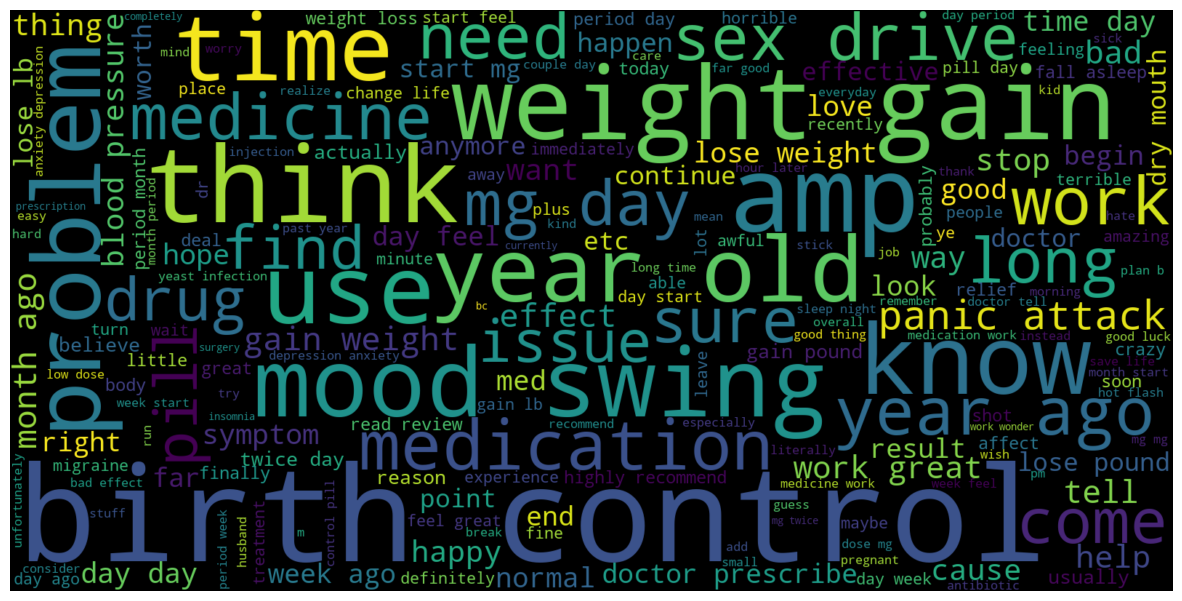

In [8]:
stop_words = STOPWORDS
nuvem_palavras(train_processed, 'review', stop_words)

In [9]:
#count_words = count_words(sentences)

#### Checking the amount of the stopwords

In [10]:
word_count = {}
for sentence in sentences:
    words = sentence.lower().split()
    for word in words:
        if word in stop_words:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

df = pd.DataFrame({'Stopword': list(word_count.keys()), 'Count': list(word_count.values())}).sort_values('Count', ascending=False)

In [11]:
df

,Stopword,Count
0,like,42714
2,having,893
1,shall,110
3,r,102
6,k,37
5,theirs,18
4,ought,15
7,com,2


In [12]:
nlp = spacy.load("en_core_web_md")

In [13]:
sentences = list(train_processed['review'])

In [14]:
from transformers import BertTokenizer
import tensorflow as tf
from tensorflow import keras

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [23]:
encoding = tokenizer.encode(sentences[0])

The tokenizer brings the word ‘bystolic’ incomplete. it can handle most of the unknown words and improve the model accuracy. 

In [25]:
sentences[0]

'effect combination bystolic mg fish oil'

In [24]:
print(tokenizer.convert_ids_to_tokens(encoding))

['[CLS]', 'effect', 'combination', 'by', '##sto', '##lic', 'mg', 'fish', 'oil', '[SEP]']


In [17]:
encoded_input = tokenizer()

**input_ids** (np.ndarray, tf.Tensor, List[tf.Tensor] `Dict[str, tf.Tensor] or Dict[str, np.ndarray] and each example must have the shape (batch_size, sequence_length)) — Indices of input sequence tokens in the vocabulary

**attention_mask** (np.ndarray or tf.Tensor of shape (batch_size, sequence_length), optional) — Mask to avoid performing attention on padding token indices. Mask values selected in [0, 1]:
1 for tokens that are not masked,
0 for tokens that are maske

**token_type_ids** (np.ndarray or tf.Tensor of shape (batch_size, sequence_length), optional) — Segment token indices to indicate first and second portions of the inputs. Indices are selected in [0, 1]:
0 corresponds to a sentence A token,
1 corresponds to a sentence B token.d.

### References 

https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/42_word2vec_gensim/42_word2vec_gensim.ipynb

https://www.youtube.com/watch?v=30zPz5Xz-8g

https://www.youtube.com/watch?v=2VwPnQeZNMA&t=567s

https://www.analyticsvidhya.com/blog/2021/09/an-explanatory-guide-to-bert-tokenizer/